### LEVEL 2 - TASK 1

### Task: Restaurant Ratings
- Analyze the distribution of aggregate ratings and determine the most common rating range.
- Calculate the average number of votes received by restaurants.


Most common ratings:  3.2


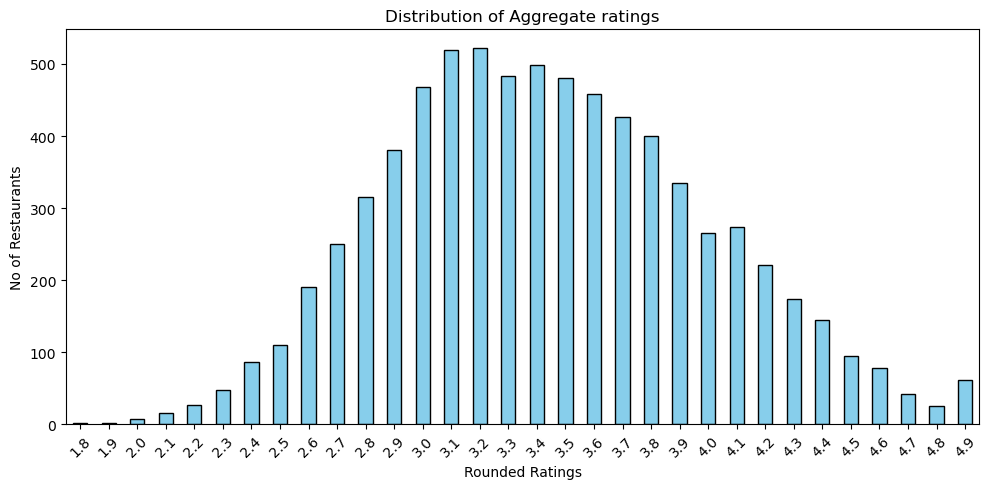

In [17]:
# 1. Analyze the distribution of aggregate ratings and determine the most common rating range.
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Cleaned_Restaurant_Data.csv')
df

df_rated = df[df['Aggregate rating'] > 0]


df['Rounded Ratings'] = df_rated['Aggregate rating'].round(1) # rounded ratings take the values from aggregate column and makkes it to 1 number after decimal
most_common_ratings = df['Rounded Ratings'].value_counts().idxmax()
print('Most common ratings: ', most_common_ratings)


rating_counts = filtered_df['Rounded Ratings'].value_counts().sort_index()

plt.figure(figsize=(10,5)) # widen the plot
df['Rounded Ratings'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Aggregate ratings')
plt.xlabel("Rounded Ratings")
plt.ylabel("No of Restaurants")

plt.xticks(rotation=45) # rotate for clear readings
plt.tight_layout()
plt.show()

In [19]:
# 2. Calculate the average number of votes received by restaurants.

avg_votes = df.groupby('Restaurant Name')['Votes'].mean().sort_values(ascending=False)
avg_votes = round(avg_votes, 2)
print("\nAverage number of votes received by restaurants: ", avg_votes)


Average number of votes received by restaurants:  Restaurant Name
Toit                 10934.0
Hauz Khas Social      7931.0
Peter Cat             7574.0
Big Brewsky           5705.0
The Black Pearl       5385.0
                      ...   
Creamy Creation          0.0
The Pure Kitchen         0.0
Angaar                   0.0
Flavours Of Delhi        0.0
Schezwan Bakery          0.0
Name: Votes, Length: 7432, dtype: float64


### LEVEL 2 - TASK 2

### Task: Cuisine Combination
- Identify the most common combinations of cuisines in the dataset.
- Determine if certain cuisine combinations tend to have higher ratings.

In [5]:
# 1. Identify the most common combinations of cuisines in the dataset

# Get the most common cuisine combinations
common_combinations = df['Cuisines'].value_counts().head(10)
# value_counts() counts how often each unique value (each unique combination of cuisines) appears in the entire column.
print("Top 10 most common cuisine combinations:")
print(common_combinations)


Top 10 most common cuisine combinations:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [7]:
# 2. Determine if certain cuisine combinations tend to have higher ratings.
avg_cuisine_combo_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print(avg_cuisine_combo_rating.head(10))

Cuisines
Continental, Indian                4.9
Bbq, Breakfast, Southern           4.9
Italian, Deli                      4.9
American, Caribbean, Seafood       4.9
American, Burger, Grill            4.9
Burger, Bar Food, Steak            4.9
Italian, Bakery, Continental       4.9
European, Asian, Indian            4.9
American, Coffee And Tea           4.9
Mexican, American, Healthy Food    4.9
Name: Aggregate rating, dtype: float64


### LEVEL 2 - TASK 3

### Task: Geographic Analysis
- Plot the locations of restaurants on a map using longitude and latitude coordinates.
- Identify any patterns or clusters of restaurants in specific areas.

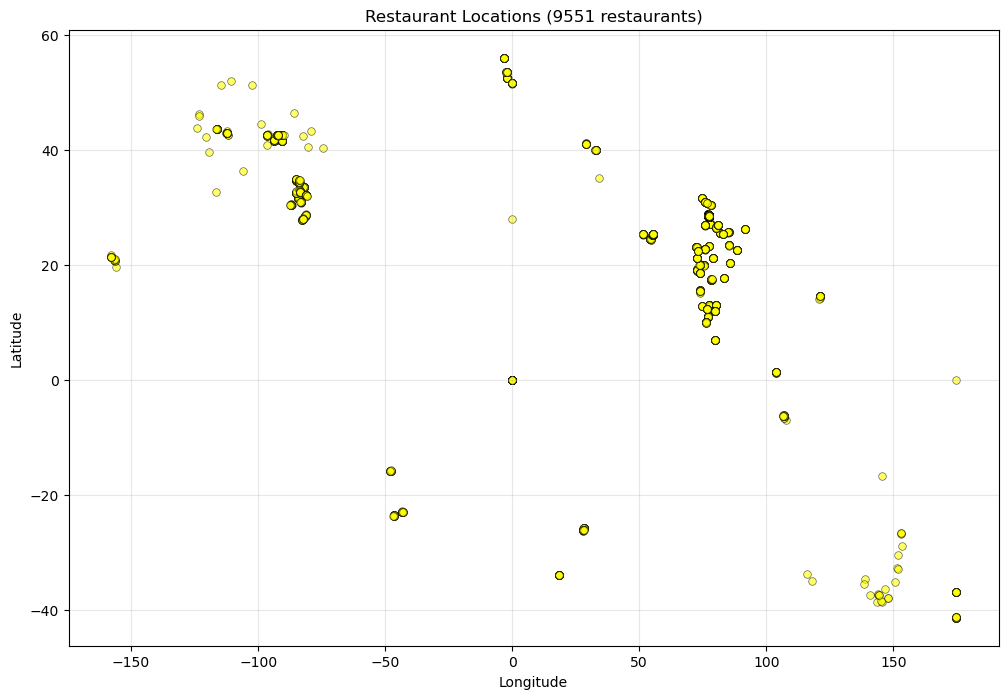

Plotted 9551 out of 9551 restaurants


In [23]:
# 1. Plot the locations of restaurants on a map using longitude and latitude coordinates.
import pandas as pd
import matplotlib.pyplot as plt

# Basic restaurant location map
df_clean = df.dropna(subset=['Longitude', 'Latitude'])

plt.figure(figsize=(12, 8))
plt.scatter(df_clean['Longitude'], df_clean['Latitude'], 
           alpha=0.6, s=30, c='yellow', edgecolors='black', linewidth=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Restaurant Locations ({len(df_clean)} restaurants)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Plotted {len(df_clean)} out of {len(df)} restaurants")

In [19]:
# 2. Identify any patterns or clusters of restaurants in specific areas.

# Count number of restaurants per locality
locality_counts = df['Locality'].value_counts().head(10)

print("Top 10 localities with the most restaurants:")
print(locality_counts)

Top 10 localities with the most restaurants:
Locality
Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Malviya Nagar           85
Pitampura               85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: count, dtype: int64


#### The above data shows that Connaught Place, Rajouri Garden, and Shahdara are the highest number of restaurants indicating clear clusters of restaurant activity in these areas.

### LEVEL 2 - TASK 4

### Task: Restaurant Chains
- Identify if there are any restaurant chains present in the dataset.
- Analyze the ratings and popularity of different restaurant chains.


In [11]:
# 1. Identify if there are any restaurant chains present in the dataset.
restaurant_counts = df['Restaurant Name'].value_counts()
chains = restaurant_counts[restaurant_counts>1] # if name occurs more than 1 time it means chains or franchise are present

print(chains.head(10))

Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
Mcdonald's          48
Keventers           34
Pizza Hut           30
Giani               29
Baskin Robbins      28
Barbeque Nation     26
Name: count, dtype: int64


In [15]:
# 2. Analyze the ratings and popularity of different restaurant chains.

chains_counts = df['Restaurant Name'].value_counts()
chains = chains_counts[chains_counts>1].index # gives if the name occurs more than one time ; returns a series
# .index extracts just the restaurant names (which are in the index of that Series), giving you a list of restaurant names that are likely chains (i.e., have multiple branches).

df_chains = df[df['Restaurant Name'].isin(chains)] # checks restaurant names are there in chains or not

# group by restaurant and aggregate
# .agg() is used with group by to apply more than one function like mean, count, sum, etc
# syntax--> df.groupby('ColumnName').agg({
#    'Column1': 'mean',
#    'Column2': 'sum',
#    ...
#   })

chain_rating_pop = df_chains.groupby('Restaurant Name').agg(
    Branch=('Restaurant Name', 'count'),
    Avg_rating=("Aggregate rating", 'mean'),
    Avg_votes=("Votes", 'mean')
).sort_values(by='Branch', ascending=False)

print(chain_rating_pop.head(10))
        

                  Branch  Avg_rating    Avg_votes
Restaurant Name                                  
Cafe Coffee Day       83    2.419277    29.253012
Domino's Pizza        79    2.740506    84.088608
Subway                63    2.907937    97.206349
Green Chick Chop      51    2.672549    18.901961
Mcdonald's            48    3.339583   110.229167
Keventers             34    2.870588    37.147059
Pizza Hut             30    3.320000   165.366667
Giani                 29    2.689655    29.448276
Baskin Robbins        28    1.860714    15.285714
Barbeque Nation       26    4.353846  1082.384615
